### Computational Guided Inquiry for PChem (Neshyba, 2021)


# Visualizing $P(T,V)$


### Maxwell's thermodynamic surface

A fundamental idea of thermodynamics is the notion of a _thermodynamic surface_. James Clerk Maxwell famously made three plaster models of a thermodynamic surface, and gave one as a present to Gibbs, shown below.

<p style='text-align: center;'>
<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Maxwell%27s_thermodynamic_surface%2C_commentary_book_figures_1%2C2.jpg" height="500" width="500"/>

__Figure 1__. Thermodynamic surface of the energy of an idealized water-like substance constructed by James Clerk Maxwell as a gift to Josiah Willard Gibbs$^1$. 
</p>

These models depict the energy of an idealized, water-like substance as a function of its volume and entropy. We'll return to the ideas of energy and entropy later, for now the important point is that _all_ substances (real or idealized) are characterized by various thermodynamic surfaces.

### State functions, state spaces, and a compact notation
Some nomenclature will help keep these ideas in mind. When we're looking at a thermodynamic surface, the *height* is called the *state function*, and the "ground" is called the _state space_. For Maxwell's surface, then, we'd say:

- The state function is the energy (commonly given the symbol $U$)
- The two state space variables are the volume ($V$) and the entropy ($S$) 

A compact notational way of saying this is to say that Maxwell's thermodynamic surface is a representation of $U(V,S)$.

### Other thermodynamic surfaces
In fact, we've already encountered two mathematical descriptions of a different thermodynamic surface, $P(T,V)$. One is given by the ideal gas law,

$$
P(T,V) = \dfrac{n R T}{V} \ \ \ \ (1)
$$

and the other is given by vdw, 

$$
P(T,V) = {{n R T} \over {V - nb}} - {{n^2 a} \over V^2}  \ \ \ (2)
$$

Here, the state function is $P$, and the state space is ($T,V$).

So what does the thermodynamic surface $P(T,V)$ look like? If you have some plaster, you could make one, like Maxwell did. Or, you could use Python to generate it. That's what this CGI is all about.

### String manipulation in Python
It turns out that making labels on graphs is kind of important. Here you'll develop some skill in doing that.

### Function definitions in Python
Sometimes, it's pretty convenient to re-use code that accomplishes a commonly-used function. You'll get an introduction to that here.

### Plotting in 3d
We'll be using the mpl_toolkits library -- so those imports have been added to our "Libraries" cell.

### Comparison metrics for thermodynamic surfaces
You've already explored various options for comparing $P_{vdw}$ to $P_{ideal}$:

- As a difference
- As a percent difference
- As a ratio  

These same metrics are valid for thermodynamic functions! Only now you'd get a difference (or %difference or ratio) as a function of the state space!

### Learning goals
The main learning goals of this exercise can be phrased follows. I can ...
1. Convert numbers and other objects to strings of characters, and join those strings together to make longer ones.
1. Use the function Statespace to create state space variables.
1. Create 3d plots that represent thermodynamic surfaces.
1. Describe conditions under which the ideal is more or less reliable.

### References
(1) Willard Gibbs: American Genius (1942), by Muriel Rukeyser.  

## Libraries 
You'll need to import various libraries for this.

In [1]:
import pint
from pint import UnitRegistry
ureg = UnitRegistry()
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [2]:
%matplotlib notebook

### The Statespace function
The code below is called a "function" definition. Execute it so that it can be used in this Notebook. You'll see examples of how it works a few more cells down. 

In [13]:
def Statespace(xspecs,yspecs):
    xarray = np.linspace(xspecs[0],xspecs[1],xspecs[2])
    yarray = np.linspace(yspecs[0],yspecs[1],yspecs[2])
    xgridtemp,ygridtemp = np.meshgrid(xarray,yarray)
    xgrid = xgridtemp.T
    ygrid = ygridtemp.T
    return xgrid, ygrid

###  Constants for our pressure calculation
We'll be using 1 mole of gas, and working in the L-atm unit system

In [4]:
# Moles, and the gas constant
n = 1*ureg("mol"); print(n)
R = 0.082057*ureg("L atm /(mol K)"); print(R)

1 mole
0.082057 liter * standard_atmosphere / kelvin / mole


### String manipulations for cool labels
The code below does some string manipulation. It'll come in very handy when you need to label the axes of plots.

In [6]:
# Join two strings
string1 = "Hello"
string2 = "World!"
label = string1+string2
print(label)

# Join a string with a number
string1 = "speed of light = "
string2 = str(3e8)
label = string1+string2
print(label)

# Join a string with units
string1 = "The units of n are "
string2 = str(n.units)
label = string1+string2
print(label)

HelloWorld!
speed of light = 300000000.0
The units of n are mole


### Your turn
Create a label from the units of R, something like "The units of R are ", joined with the units of R.

In [7]:
### BEGIN SOLUTION
string1 = "The units of R are "
string2 = str(R.units)
label = string1+string2
print(label)
### END SOLUTION

The units of R are liter * standard_atmosphere / kelvin / mole


### Creating state spaces
The cell below uses the function Statespace to create a state space with the following properites:
- variable "xgrid", having 3 values running from 2 to 4
- variable "ygrid", having 4 values running from 5 to 8

After creating those variables, we attach units to them (Statespace doesn't "do" units).

In [16]:
# This creates the numerical grid
xgrid,ygrid = Statespace([2,4,3],[5,8,4])

# This attaches units
xgrid*=ureg("meter")
ygrid*=ureg("meter")

# Checking out the results
print("Here's xgrid:\n",xgrid)
print("Here's ygrid:\n",ygrid)

Here's xgrid:
 [[2.0 2.0 2.0 2.0] [3.0 3.0 3.0 3.0] [4.0 4.0 4.0 4.0]] meter
Here's ygrid:
 [[5.0 6.0 7.0 8.0] [5.0 6.0 7.0 8.0] [5.0 6.0 7.0 8.0]] meter


### Your turn
Here you'll practice your state-space-making skills. Here's what we want:
- variable "Tgrid", having 51 values running from 200 to 400 K
- variable "Vgrid", having 42 values running from 1 to 42 L

In [17]:
### BEGIN SOLUTION
Tgrid,Vgrid = Statespace([200,400,51],[1,42,42])
Tgrid*=ureg("K")
Vgrid*=ureg("L")
print("Here's Tgrid:\n",Tgrid)
print("Here's Vgrid:\n",Vgrid)
### END SOLUTION

Here's Tgrid:
 [[200.0 200.0 200.0 ... 200.0 200.0 200.0] [204.0 204.0 204.0 ... 204.0 204.0 204.0] [208.0 208.0 208.0 ... 208.0 208.0 208.0] ... [392.0 392.0 392.0 ... 392.0 392.0 392.0] [396.0 396.0 396.0 ... 396.0 396.0 396.0] [400.0 400.0 400.0 ... 400.0 400.0 400.0]] kelvin
Here's Vgrid:
 [[1.0 2.0 3.0 ... 40.0 41.0 42.0] [1.0 2.0 3.0 ... 40.0 41.0 42.0] [1.0 2.0 3.0 ... 40.0 41.0 42.0] ... [1.0 2.0 3.0 ... 40.0 41.0 42.0] [1.0 2.0 3.0 ... 40.0 41.0 42.0] [1.0 2.0 3.0 ... 40.0 41.0 42.0]] liter


### Visualizing the ideal gas equation of state as a thermodynamic surface
The cell below is blocked off into three parts:

- The first part calculates $P(T,V)$ ("Pgrid_ideal") for an ideal gas. 

- The second part prepares some labels that include the units.

- The third part displays $P(T,V)$ as a thermodynamic function.

standard_atmosphere


<IPython.core.display.Javascript object>


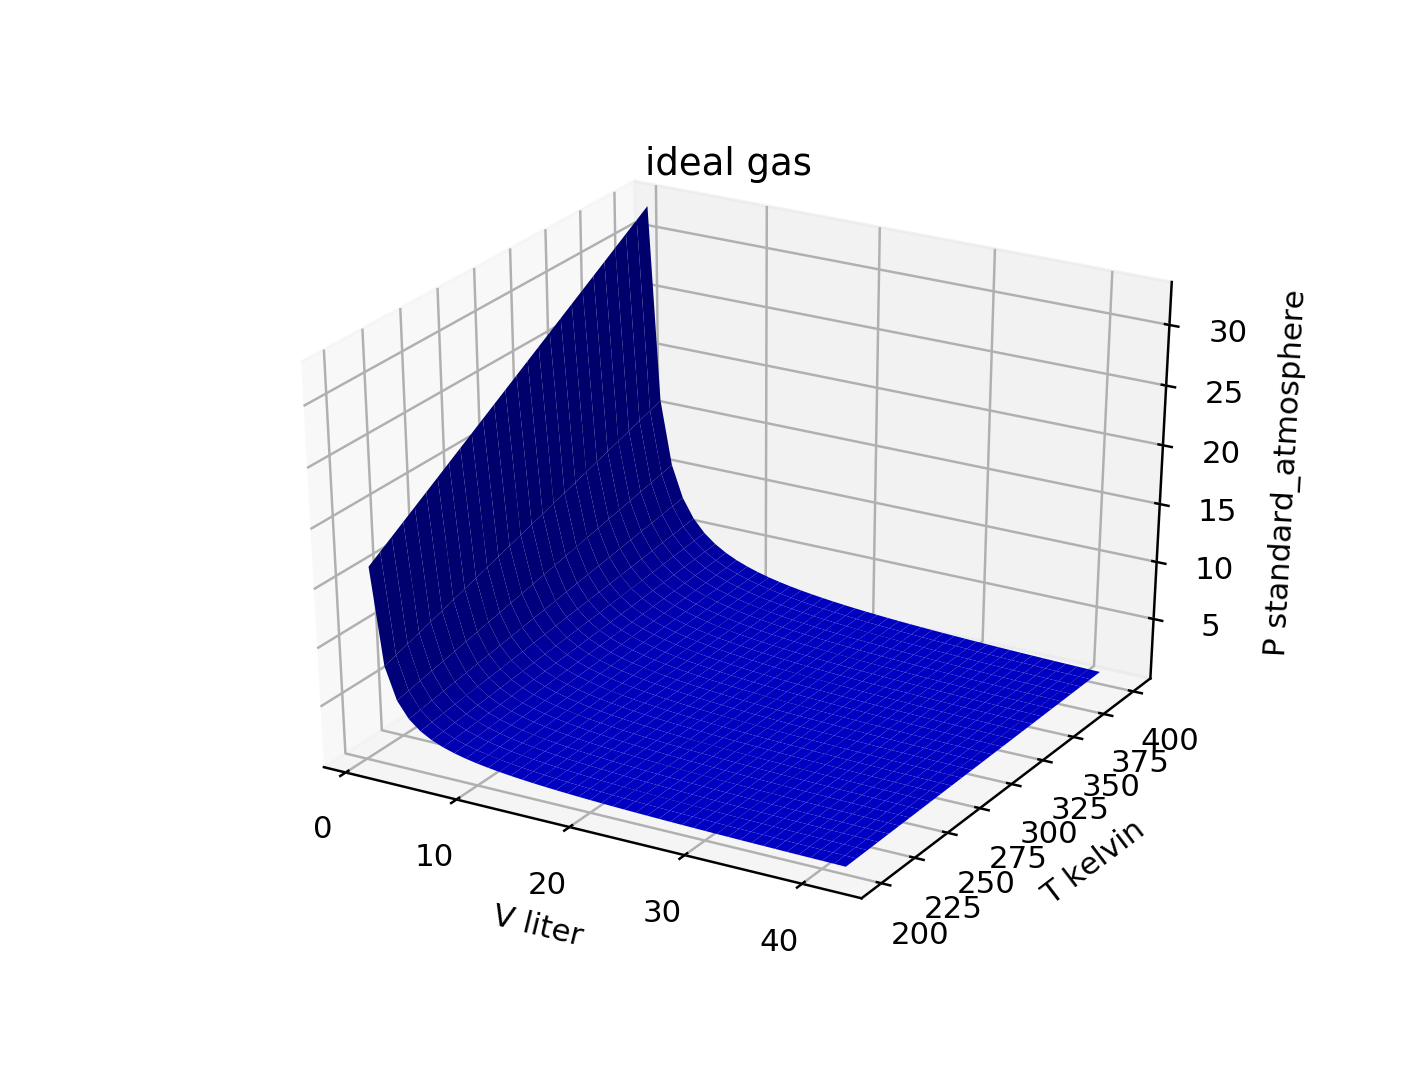

Text(0.5, 0.92, 'ideal gas')

In [18]:
# Get the pressure of an ideal gas
Pgrid_ideal = n*R*Tgrid/Vgrid
print(Pgrid_ideal.units)

# Prepping the axis labels
xlabel = "V "+str(Vgrid.units) 
ylabel = "T "+str(Tgrid.units)
zlabel = "P "+str(Pgrid_ideal.units)

# Open up a 3d figure window, and graph the surface
ax = plt.figure().gca(projection='3d') # Set up a three dimensional graphics window 
ax.plot_surface(Vgrid, Tgrid, Pgrid_ideal, color='blue') # Make the mesh plot P(V,T)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(zlabel)
ax.set_title("ideal gas")

### Your turn - vdw
Use the cell below to:

- Calculate $P(T,V)$ ("Pgrid_vdw") for Argon gas, using van der Waals' equation. 

- Prepare some labels that include the units.

- Display $P(T,V)$ as a thermodynamic function.


1.355 bar * liter ** 2 / mole ** 2
0.032 liter / mole
standard_atmosphere


<IPython.core.display.Javascript object>


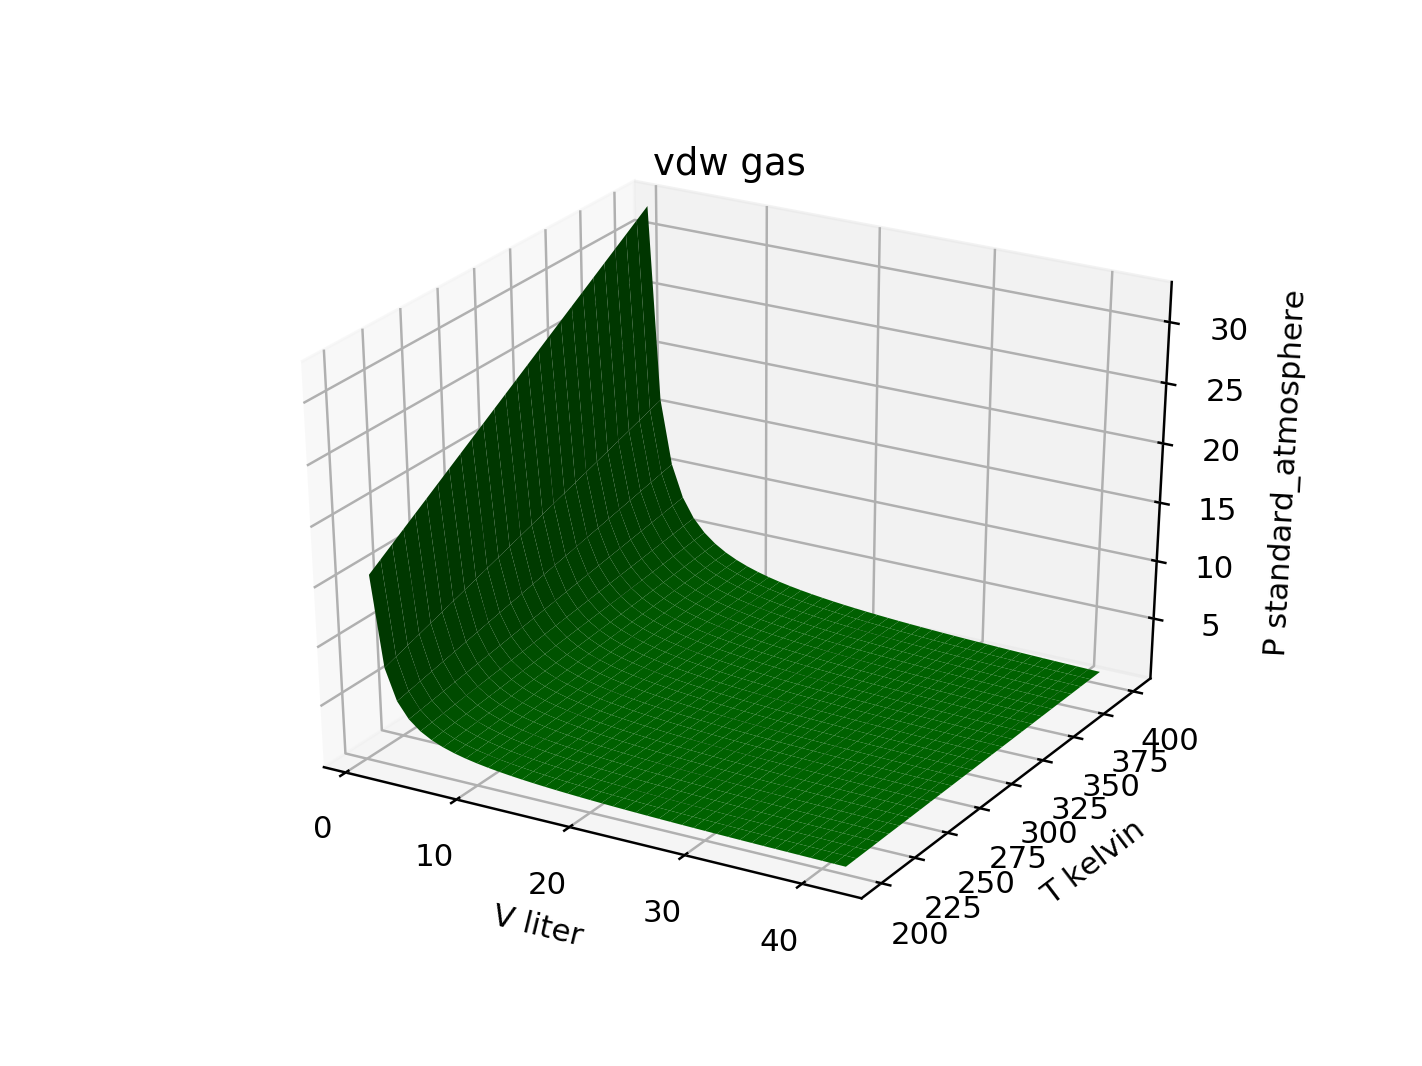

Text(0.5, 0.92, 'vdw gas')

In [14]:
### BEGIN SOLUTION
a = 1.355*ureg('L^2 bar / mol^2'); print(a)
b = 0.032*ureg('L /mol'); print(b)

Pgrid_vdw = n*R*Tgrid/(Vgrid-n*b)-n**2*a/Vgrid**2
print(Pgrid_vdw.units)

# Open up a 3d figure window
ax = plt.figure().gca(projection='3d') # Set up a three dimensional graphics window 

# Graph the pressure
ax.plot_surface(Vgrid, Tgrid, Pgrid_vdw, color='green') # Make the mesh plot P(V,T)
ax.set_xlabel("V "+str(Vgrid.units)) # Label axes
ax.set_ylabel("T "+str(Tgrid.units))
ax.set_zlabel("P "+str(Pgrid_vdw.units))
ax.set_title("vdw gas")
### END SOLUTION

### Your challenge
In the cell below, calculate a new thermodynamic surface that will reveal the conditions under which the ideal gas is more/less reliable. You can do this using one of the comparison metrics (difference, %difference, ratio) you are already familiar with. Label the axes, and specify a title. 

standard_atmosphere


<IPython.core.display.Javascript object>


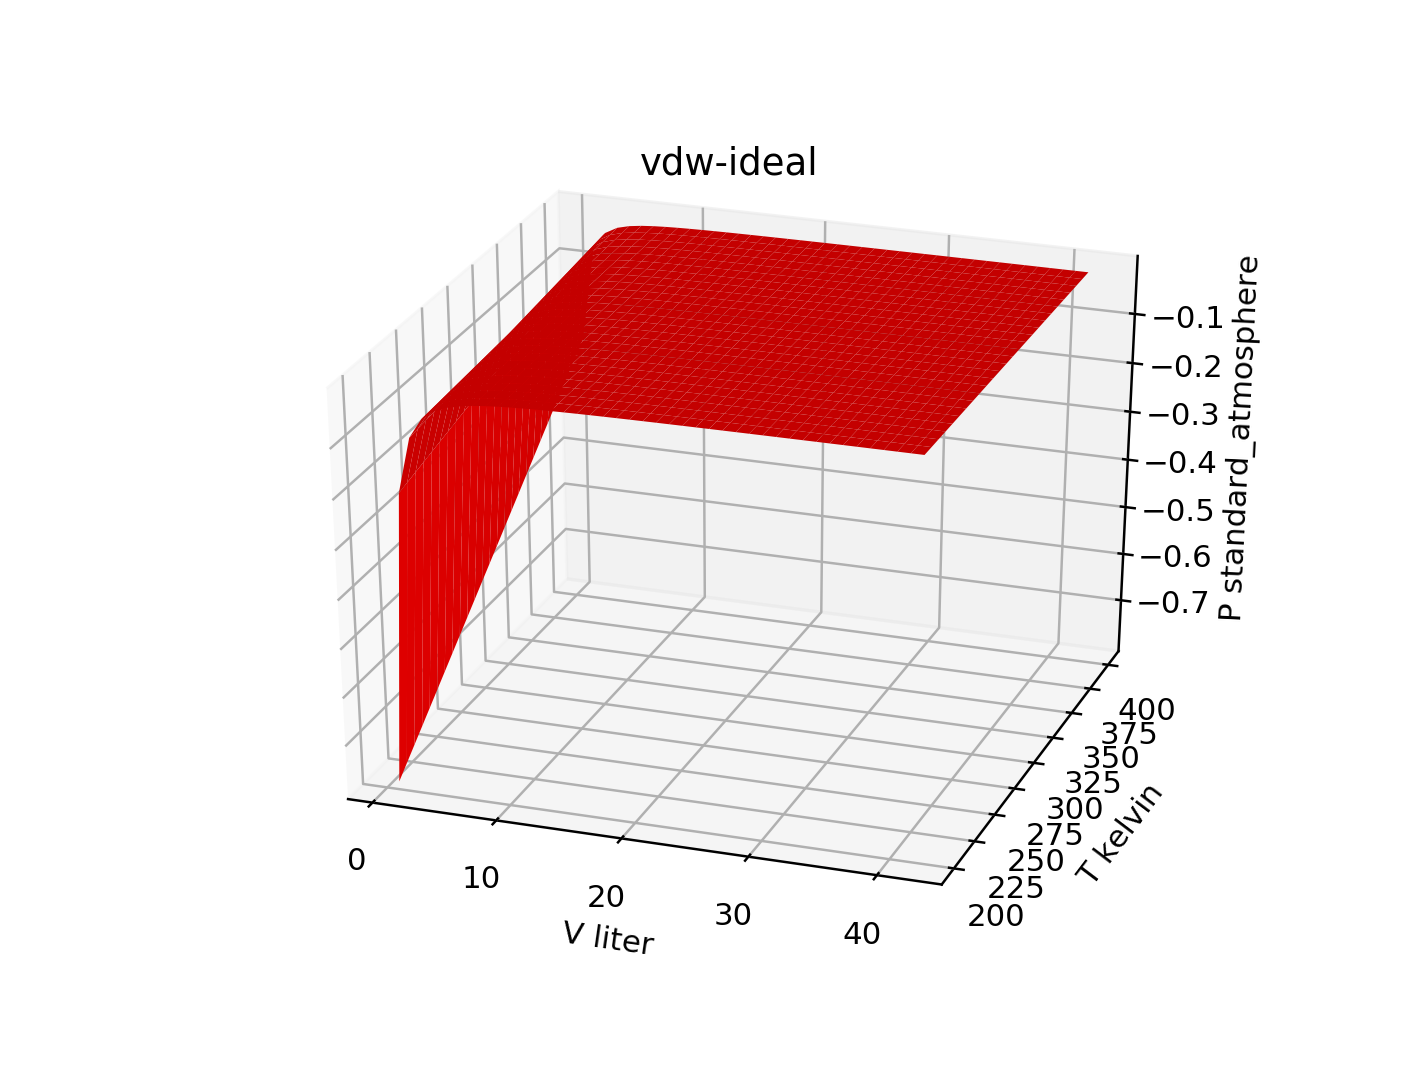

Text(0.5, 0.92, 'vdw-ideal')

In [12]:
### BEGIN SOLUTION
Pgrid_diff = Pgrid_vdw - Pgrid_ideal
print(Pgrid_diff.units)

# Open up a 3d figure window
ax = plt.figure().gca(projection='3d') # Set up a three dimensional graphics window 

# Graph the pressure
ax.plot_surface(Vgrid, Tgrid, Pgrid_diff, color='red') # Make the mesh plot P(V,T)
ax.set_xlabel("V "+str(Vgrid.units)) # Label axes
ax.set_ylabel("T "+str(Tgrid.units))
ax.set_zlabel("P "+str(Pgrid_ideal.units))
ax.set_title("vdw-ideal")
### END SOLUTION

### Pause for Analysis
In the cell below, write some comments about this ... Does the deviation from ideal get worse at high volume, or low volume? Any trend in temperature? Which seems govern the deviation from ideal, temperature or volume? 

### One last refresh and save
We're at the end of the notebook. You should repeat the "Three steps for refreshing and saving your code" you did before. Instead of using the dropdown menu "Cell/Run All Above", however, you may as well use "Cell/Run All".

### Validating
This step will help ensure that you didn't miss something (although it's not a guarantee). Find the "Validate" button and press it. If there are any errors or warnings, fix them.

### Three steps for finishing up
Assuming all this has gone smoothly, there will be three more steps (but read this carefully before carrying them out):
1. Close this notebook using the "File/Close and Halt" dropdown menu
1. Using the Assignments tab, submit this notebook
1. Press the Logout tab of the Home Page